# Strips Dataset
Script to genenerate a dataset composed of idenitified strips/patches of 256pp from the images from the original socrates dataset.


### Dataset structure:

* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* student_id1:
    * ori_img_name_x_y.png
* ...

The Train/Val/Test split will be done afterwards by assigning student id's to each set.

In [2]:
ori_datadir = "/home/data/socrates/"
out_datadir = "/home/data/strips_socrates"

In [3]:
import os
import cv2 
import numpy as np
import glob
import matplotlib.pyplot as plt

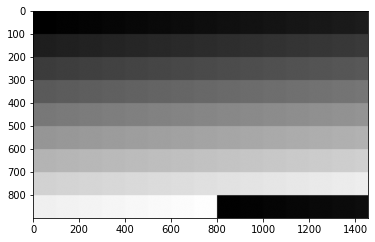

In [4]:
test = np.zeros((899, 1456, 3))
value = 0
for ystrip in range(0, 899, 100):
    for xstrip in range(0, 1456, 100):
        test[ystrip:ystrip+100, xstrip:xstrip+100, :] = (value % 255) / 255
        value += 2
plt.imshow(test)
    

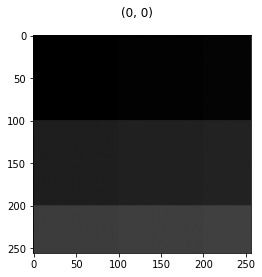

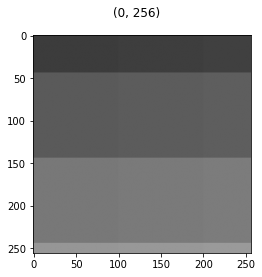

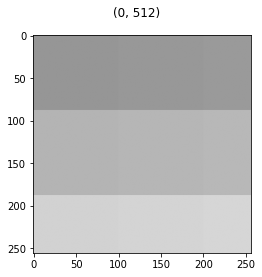

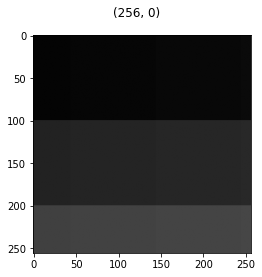

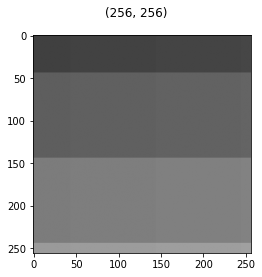

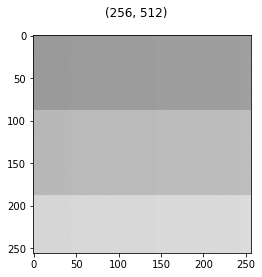

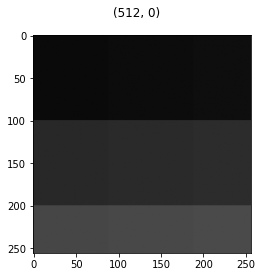

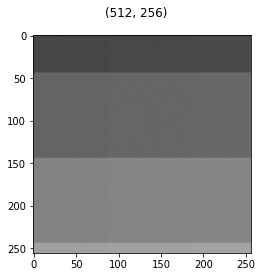

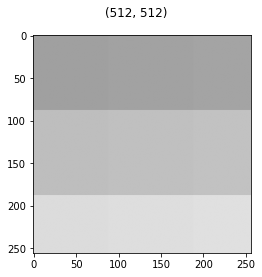

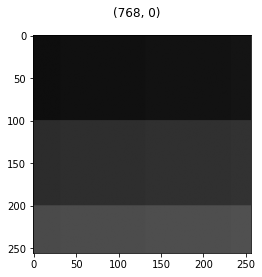

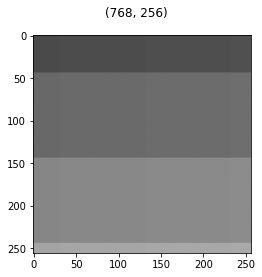

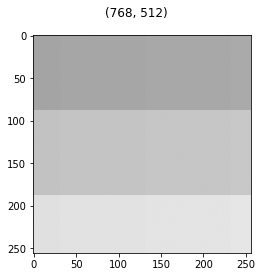

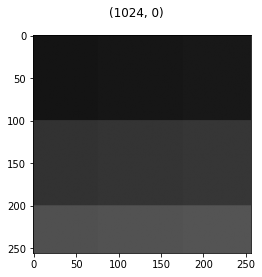

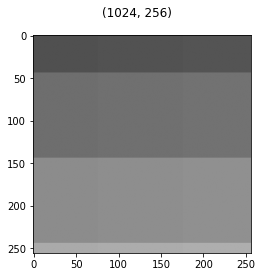

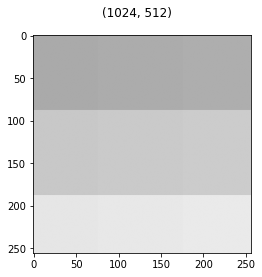

In [5]:
h = 899
w = 1456
num_vstrips = h // 256
num_hstrips = w // 256
strips = []
for x in range(num_hstrips):
    x0 = x * 256
    x1 = x0 + 256
    for y in range(num_vstrips):
        y0 = y * 256
        y1 = y0 + 256
        strip = test[y0:y1, x0:x1, :]
        strips.append(((x0,y0), strip))
for strip in strips:
    plt.figure()
    plt.suptitle(str(strip[0]))
    plt.imshow(strip[1])

In [12]:
procssd = 0
for img_file in os.scandir(ori_datadir):
    procssd += 1
    if procssd % 100 == 0:
        print(procssd)
    student_id = img_file.name.split('_')[1]
    if student_id == "101":
        continue
    if not (img_file.path.endswith('.JPG') or img_file.path.endswith('.jpg')):
        print("Bad filetype: ", img_file.name)
        continue
    student_id = img_file.name.split('_')[1]
    outdir = os.path.join(out_datadir, student_id)
    try:
        os.mkdir(outdir)
    except OSError as error:
        if (error.errno == 17):
            pass
        else:
            print(error)
            print(error.errno)
    wimg = cv2.imread(img_file.path)
    height, width, channels = wimg.shape
    num_vstrips = height // 256
    num_hstrips = width // 256
    for x in range(num_hstrips):
        x0 = x * 256
        x1 = x0 + 256
        for y in range(num_vstrips):
            y0 = y * 256
            y1 = y0 + 256
            strip = wimg[y0:y1, x0:x1, :]
            or_name = img_file.name.split('.')[0]
            strip_name = or_name + "_" + str(x0) + "_" + str(y0) + ".PNG"
            cv2.imwrite(os.path.join(outdir, strip_name), strip)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
Bad filetype:  Eurecom_137_video_007.mov
3400
Bad filetype:  Eurecom_137_video_008.mov
3500
3600
3700
3800
3900
4000
4100
Bad filetype:  Eurecom_137_video_010.mov
4200
4300
4400
4500
4600
4700
4800
Bad filetype:  Eurecom_137_video_003.mov
4900
5000
Bad filetype:  Eurecom_137_video_001.mov
5100
5200
Bad filetype:  Eurecom_137_video_006.mov
5300
5400
5500
5600
5700
5800
Bad filetype:  Eurecom_137_video_009.mov
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
Bad filetype:  Eurecom_137_video_004.mov
7000
7100
7200
7300
7400
7500
7600
Bad filetype:  Eurecom_137_video_005.mov
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
Bad filetype:  Eurecom_137_video_002.mov
9000
9100
9200
9300
9400
9500
9600
9700


### Info file

In [13]:
import json

In [23]:
dataset = []
os.remove(os.path.join(out_datadir, 'dataset_info.json'))
for student_id in os.scandir(out_datadir):
    img_strips = {}
    for img in os.scandir(student_id):
        o_img_name = ('_').join(img.name.split('_')[0:4])
        if o_img_name not in img_strips:
            img_strips[o_img_name] = [img.path]
        else:
            img_strips[o_img_name].append(img.path)
    for l in img_strips.values():
        l.sort()
    img_strips_l = [(k, v) for k, v in img_strips.items()] 
    img_strips_l.sort()
    dataset.append(img_strips_l)

In [24]:
with open(os.path.join(out_datadir, 'dataset_info.json'), 'w') as f:
    json.dump(dataset, f)

In [25]:
strips = 0
images = 0
min_strips = 99999
min_images = 99999

for s in dataset:
    images += len(s)
    if len(s) < min_images:
        min_images = len(s)
    for i in s:
        strips += len(i[1])
        if len(i) < min_strips:
            min_strips = len(i)
print(images, strips, min_images, min_strips)

9061 1124061 89 2


# THERE are some devices that have images of different sizes!!
check where and delete. There was only one, so manually deleted. For future report it was eurecom_104_picFG_0_30

In [26]:
strips_std = []
for std in dataset:
    nstrips = len(std[0][1])
    nstripsi = [std[0][0], nstrips]
    for im in std:
        if len(im[1]) != nstrips:
            nstripsi.append(len(im[1]))
    strips_std.append(nstripsi)

In [27]:
strips_std

[['Eurecom_101_picBG_001', 220],
 ['Eurecom_198_picBG_001', 144],
 ['Eurecom_155_picBG_001', 192],
 ['Eurecom_129_picBG_001', 108],
 ['Eurecom_136_picBG_001', 84],
 ['Eurecom_121_picBG_001', 70],
 ['Eurecom_111_picBG_001', 192],
 ['Eurecom_165_picBG_001', 108],
 ['Eurecom_191_picBG_001', 144],
 ['Eurecom_102_picBG_001', 144],
 ['Eurecom_118_picBG_001', 28],
 ['Eurecom_217_picBG_001', 144],
 ['Eurecom_170_picBG_001', 108],
 ['Eurecom_211_picBG_001', 6],
 ['Eurecom_183_picBG_001', 165],
 ['Eurecom_190_picBG_001', 165],
 ['Eurecom_112_picBG_001', 84],
 ['Eurecom_195_picBG_001', 108],
 ['Eurecom_108_picBG_001', 108],
 ['Eurecom_174_picBG_001', 180],
 ['Eurecom_199_picBG_001', 220],
 ['Eurecom_184_picBG_001', 190],
 ['Eurecom_185_picBG_001', 165],
 ['Eurecom_159_picBG_001', 220],
 ['Eurecom_197_picBG_001', 50],
 ['Eurecom_150_picBG_001', 2],
 ['Eurecom_146_picBG_001', 108],
 ['Eurecom_210_picBG_001', 108],
 ['Eurecom_194_picBG_001', 72],
 ['Eurecom_202_picBG_001', 144],
 ['Eurecom_119_picBG

###  Visualize some images to ensure correct dataset shape

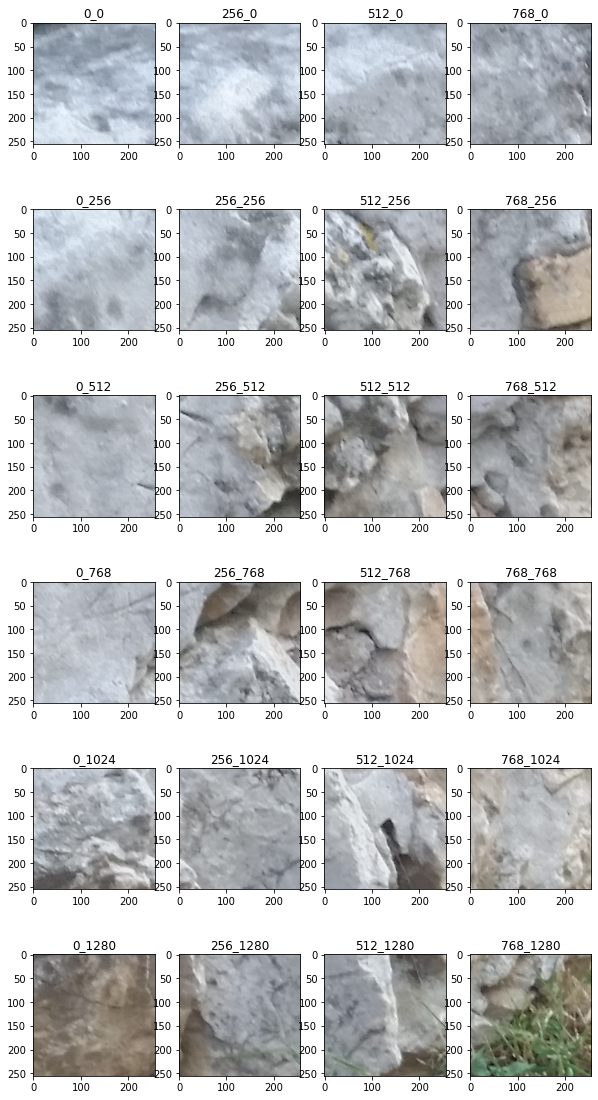

In [7]:
test_s = dataset[0]
test_img = test_s['Eurecom_101_picFG_013']
base_name = ('_').join(test_img[0].split('_')[0:5])
plt.figure(figsize=(10,20))
for y in range(0, 6):
    for x in range(0,4):
        strip = cv2.imread(f'{base_name}_{x*256}_{y*256}.PNG')
        ax = plt.subplot(6, 4, (y*4+x)+1)
        ax.imshow(strip[:,:,::-1])
        ax.set_title(f'{x*256}_{y*256}')
plt.show()